**Задание No4.1. Интерполирование: Полиномы Лагранжа и Ньютона**

*Цель задания: практическое освоение методов интерполирования функций*

Функция: $x^2+ctg(x)$


In [ ]:
from math import cos, sin, pi
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axisartist.axislines import AxesZero

a = pi/10 # start point
b = 9*pi/10 # end point
n = 5 # number of arbitrary points

def f(x):
    try:
        return x**2 + cos(x)/sin(x)
    except (AttributeError, TypeError):
        return [f(_) for _ in x]

def f_test(x):
    return {0:1, 0.25:2, 0.5:1, 0.75:0, 1:1}[x]

def even_distributed_points(n):
    return np.linspace(a, b, num=n)

def optimal_distributed_points(n):
    points = [0]*n
    for i in range(n - 2):
        points[i + 1] = 1/2 * ((b - a)*cos((2*i + 1)/(2*(n - 1))*pi) + (b + a))
    points[0] = b
    points[-1] = a
    return points[::-1]

def draw_function(f):
    x_axis = np.linspace(a, b, 1000)
    y_axis = f(x_axis)
    fig, ax = plt.subplots()
    ax = fig.add_subplot(axes_class=AxesZero)
    for direction in ["xzero", "yzero"]:
        ax.axis[direction].set_axisline_style("-|>")
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        ax.axis[direction].set_visible(False)

    ax.plot(x_axis, y_axis)
    #ax.set(title='ctg(x) + x^2')
    ax.grid(True, linestyle='-.')
    ax.tick_params(labelcolor='r', labelsize='medium', width=3)
    plt.axis([-2, 7, -1, 6])
    plt.show()

def max_deviation(method, m=n*10):
    M = np.linspace(a, b, m)
    ans = []
    for i in range(m):
        ans.append(abs(f(M[i]) - method(f, M[i], n)))
    return(max(ans))

def check_in_knots(f, method, knot_type, n):
    X = knot_type(n)
    ans = []
    for i in range(n):
        ans.append(abs(f(X[i]) - method(f, X[i], n)))
    return max(ans)

def show_all_graphics(n):
    x = np.linspace(a, b, 1000)
    fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(25, 8), sharex=True, sharey=True)
    for ax, method in zip(axs.flat, methods.keys()):
        y = [methods[method](f, _, n) for _ in x]
        ax.set_title(method)
        ax.grid(True, linestyle='-.')
        ax.plot(x, y)
    plt.axis([-2, 5, 0.5, 6])
    fig.show()

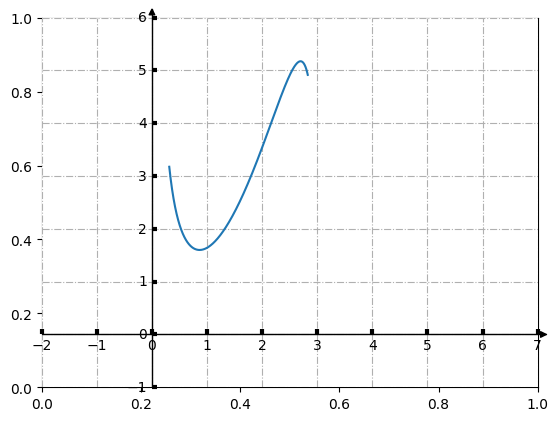

In [ ]:
draw_function(f)

In [ ]:
#@title все методы(лагранж, ньютон и три вида сплайнов)
def L(f, x, n):
    X = even_distributed_points(n)
    result = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if j != i:
                l = l * (x - X[j]) / (X[i] - X[j])
        result += l * f(X[i])
    return result

def L_opt(f, x, n):
    X = optimal_distributed_points(n)
    result = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if j != i:
                l = l * (x - X[j]) / (X[i] - X[j])
        result += l * f(X[i])
    return result

def N(f, x, n):
    X = even_distributed_points(n)
    result = f(X[0])
    for k in range(n-1):
        f_i = 0
        for i in range(k + 2):
            g_ik = 1
            for j in range(k + 2):
                if i != j:
                    g_ik /= (X[i] - X[j])
            f_i += g_ik * f(X[i])
        for j in range(k + 1):
            f_i *= x - X[j]
        result += f_i
    return result


def N_opt(f, x, n):
    X = optimal_distributed_points(n)
    result = f(X[0])
    for k in range(n-1):
        f_i = 0
        for i in range(k + 2):
            g_ik = 1
            for j in range(k + 2):
                if i != j:
                    g_ik /= (X[i] - X[j])
            f_i += g_ik * f(X[i])
        for j in range(k + 1):
            f_i *= x - X[j]
        result += f_i
    return result

def find_interval(p, arr):
    arr.sort()
    l = 0
    r = len(arr) - 1
    if p < arr[0] or p > arr[-1]: raise AttributeError(f"input point {p} is not correct, should be in {arr[0]}, {arr[-1]}, array:{arr}")
    while l < r:
        if arr[0] < p < arr[1]: return 0
        #if arr[-1] == p: return r
        mid = (l + r) // 2
        if arr[mid] < p:
            if arr[mid + 1] > p >= arr[mid]: return mid
            l = mid + 1
        elif arr[mid] > p:
            if arr[mid - 1] <= p < arr[mid]: return mid - 1
            r = mid + 1
        else: return mid
    return mid

def S_linear(f, x, n):
    X = even_distributed_points(n)
    result = 0
    interv = find_interval(x, X)
    x1 = X[interv]
    x2 = X[interv + 1]
    y1, y2 = f(x1), f(x2)
    result = (x - x1) * (y2 - y1) / (x2 - x1) + y1
    return result

def S_linear_opt(f, x, n):
    X = optimal_distributed_points(n)
    result = 0
    interv = find_interval(x, X)
    x1 = X[interv]
    x2 = X[interv + 1]
    y1, y2 = f(x1), f(x2)
    result = (x - x1) * (y2 - y1) / (x2 - x1) + y1
    return result

def S_square(f, x, n):
    X = even_distributed_points(n)
    d = 0
    A = np.zeros(((n - 1) * 3, (n - 1) * 3))
    b = np.zeros(((n - 1) * 3, 1))

    for i in range(0, (n - 1) * 3, 3):
        j = i // 3
        A[i + 0][i + 0] = X[j]**2
        A[i + 0][i + 1] = X[j]
        A[i + 0][i + 2] = 1
        A[i + 1][i + 0] = X[j + 1]**2
        A[i + 1][i + 1] = X[j + 1]
        A[i + 1][i + 2] = 1
        if i + 3 < (n - 1) * 3:
            A[i + 2][i + 0] = 2 * X[j + 1]
            A[i + 2][i + 1] = 1
            A[i + 2][i + 2] = 0
            A[i + 2][i + 3] = -2 * X[j + 1]
            A[i + 2][i + 4] = -1
        b[i + 0] = f(X[j + 0])
        b[i + 1] = f(X[j + 1])

    A[-1][-3] = 2 * X[-1]
    A[-1][-2] = 1
    b[-1] = d
    coeff = np.linalg.solve(A, b)
    coeff = np.ndarray.flatten(coeff)
    interv = find_interval(x, X)
    ai = np.zeros((3))
    ai[0] = coeff[interv * 3]
    ai[1] = coeff[interv * 3 + 1]
    ai[2] = coeff[interv * 3 + 2]
    return x**2 * ai[0] + x * ai[1] + ai[2]

def S_square_opt(f, x, n):
    X = optimal_distributed_points(n)
    X = even_distributed_points(n)
    d = 0
    A = np.zeros(((n - 1) * 3, (n - 1) * 3))
    b = np.zeros(((n - 1) * 3, 1))

    for i in range(0, (n - 1) * 3, 3):
        j = i // 3
        A[i + 0][i + 0] = X[j]**2
        A[i + 0][i + 1] = X[j]
        A[i + 0][i + 2] = 1
        A[i + 1][i + 0] = X[j + 1]**2
        A[i + 1][i + 1] = X[j + 1]
        A[i + 1][i + 2] = 1
        if i + 3 < (n - 1) * 3:
            A[i + 2][i + 0] = 2 * X[j + 1]
            A[i + 2][i + 1] = 1
            A[i + 2][i + 2] = 0
            A[i + 2][i + 3] = -2 * X[j + 1]
            A[i + 2][i + 4] = -1
        b[i + 0] = f(X[j + 0])
        b[i + 1] = f(X[j + 1])

    A[-1][-3] = 2 * X[-1]
    A[-1][-2] = 1
    b[-1] = d
    coeff = np.linalg.solve(A, b)
    coeff = np.ndarray.flatten(coeff)
    interv = find_interval(x, X)
    ai = np.zeros((3))
    ai[0] = coeff[interv * 3]
    ai[1] = coeff[interv * 3 + 1]
    ai[2] = coeff[interv * 3 + 2]
    return x**2 * ai[0] + x * ai[1] + ai[2]

def S_cubic(f, x, n):
    X = even_distributed_points(n)

    interv = find_interval(x, X)
    h = np.array([X[i + 1] - X[i] for i in range(n - 1)])
    H = np.zeros((n - 2, n - 2))
    g = np.zeros((n - 2, 1))
    d2y = np.zeros((n, 1))
    dy = np.zeros((n - 1, 1))
    y = [f(_) for _ in X]

    for i in range(1, n - 1):
        g[i - 1] = 6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])

    H[0][0] = 2 * (h[0] + h[1])
    H[0][1] = h[1]
    H[-1][-2] = h[n - 3]
    H[-1][-1] = 2 * (h[n - 3] + h[n - 2])
    for i in range(1, n - 3):
        H[i][i + 1] = h[i + 1]
        H[i][i] = 2 * (h[i] + h[i + 1])
        H[i][i - 1] = h[i]

    d2y[1:-1] = np.linalg.solve(H, g)
    for i in range(n - 1):
        dy[i] = (y[i + 1] - y[i]) / h[i] - d2y[i + 1] * h[i] / 6 - d2y[i] * h[i] / 3

    i = interv
    return (y[i] + dy[i] * (x - X[i]) + d2y[i] * (x-X[i])**2 / 2 + (d2y[i + 1] - d2y[i]) * (x - X[i])**3 / 6 / h[i])[0]

def S_cubic_opt(f, x, n):
    X = optimal_distributed_points(n)

    interv = find_interval(x, X)
    h = np.array([X[i + 1] - X[i] for i in range(n - 1)])
    H = np.zeros((n - 2, n - 2))
    g = np.zeros((n - 2, 1))
    d2y = np.zeros((n, 1))
    dy = np.zeros((n - 1, 1))
    y = [f(_) for _ in X]

    for i in range(1, n - 1):
        g[i - 1] = 6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])

    H[0][0] = 2 * (h[0] + h[1])
    H[0][1] = h[1]
    H[-1][-2] = h[n - 3]
    H[-1][-1] = 2 * (h[n - 3] + h[n - 2])
    for i in range(1, n - 3):
        H[i][i + 1] = h[i + 1]
        H[i][i] = 2 * (h[i] + h[i + 1])
        H[i][i - 1] = h[i]

    d2y[1:-1] = np.linalg.solve(H, g)
    for i in range(n - 1):
        dy[i] = (y[i + 1] - y[i]) / h[i] - d2y[i + 1] * h[i] / 6 - d2y[i] * h[i] / 3

    i = interv
    return (y[i] + dy[i] * (x - X[i]) + d2y[i] * (x-X[i])**2 / 2 + (d2y[i + 1] - d2y[i]) * (x - X[i])**3 / 6 / h[i])[0]

In [ ]:
NL_methods = {
    'Newton' : N,
    'Newton_opt' : N_opt,
    'Lagrange' : L,
    'Lagrange_opt' : L_opt,
}
spline_methods = {
    'Spline_linear' : S_linear,
    'Spline_linear_opt' : S_linear_opt,
    'Spline_square' : S_square,
    'Spline_square_opt' : S_square_opt,
    'Spline_cubic' : S_cubic,
    'Spline_cubic_opt' : S_cubic_opt
}
methods = {
    'Newton' : N,
    'Newton_opt' : N_opt,
    'Lagrange' : L,
    'Lagrange_opt' : L_opt,
    'Spline_linear' : S_linear,
    'Spline_linear_opt' : S_linear_opt,
    'Spline_square' : S_square,
    'Spline_square_opt' : S_square_opt,
    'Spline_cubic' : S_cubic,
    'Spline_cubic_opt' : S_cubic_opt
}

In [ ]:
#@title ввод данных в таблицу (лагранж и ньютон)
# table = []
# for n in [5, 10, 15, 20, 25, 30, 40, 50]:
#     for m in [n*10, n*20, n*100]:
#         RL = max_deviation(L, m)
#         RL_opt = max_deviation(L_opt, m)
#         RN = max_deviation(N, m)
#         RN_opt = max_deviation(N_opt, m)
#         table.append([n, m, RL, RL_opt, RN, RN_opt])

# df = pd.DataFrame(table, columns=['количество узлов (n)',
#                                   'количество проверочных точек (m)',
#                                   'максимальное отклонение (RL)',
#                                   'максимальное отклонение (RLopt)',
#                                   'максимальное отклонение (RN)',
#                                   'максимальное отклонение (RNopt)'])
# writer = pd.ExcelWriter('interpolation_table1.xlsx')
# df.to_excel(writer)
# writer.save()

In [ ]:
#@title ввод данных в таблицу (сплайны)
table = []
for n in [5, 10, 15, 20, 25, 30, 40, 50]:
    for m in [n*10, n*20, n*50]:
        table.append([n, m] + [max_deviation(_, m) for _ in spline_methods.values()])

df_splines = pd.DataFrame(table, columns=['количество узлов (n)',
                                  'количество проверочных точек (m)',
                                  'максимальное отклонение (linear)',
                                  'максимальное отклонение (linear_opt)',
                                  'максимальное отклонение (square)',
                                  'максимальное отклонение (square_opt)',
                                  'максимальное отклонение (cubic)',
                                  'максимальное отклонение (cubic_opt)'])


In [ ]:
writer = pd.ExcelWriter('interpolation_table_splines.xlsx')
df_splines.to_excel(writer)
writer.save()
df_splines

,количество узлов (n),количество проверочных точек (m),максимальное отклонение (linear),максимальное отклонение (linear_opt),максимальное отклонение (square),максимальное отклонение (square_opt),максимальное отклонение (cubic),максимальное отклонение (cubic_opt)
0,5,50,0.655374,0.812628,0.301369,0.301369,0.479669,0.626115
1,5,100,0.655847,0.813681,0.302508,0.302508,0.479820,0.626440
2,5,250,0.656896,0.814280,0.302851,0.302851,0.479882,0.626987
3,10,100,0.253837,0.125503,0.238466,0.238466,0.164615,0.078084
4,10,200,0.254209,0.125507,0.239246,0.239246,0.164659,0.080142
5,10,500,0.254581,0.125507,0.239419,0.239419,0.164758,0.080103
6,15,150,0.137685,0.046034,0.180524,0.180524,0.082118,0.016135
7,15,300,0.137723,0.046654,0.180546,0.180546,0.082132,0.016634
8,15,750,0.137973,0.046685,0.180557,0.180557,0.082174,0.016719
9,20,200,0.086743,0.026251,0.142390,0.142390,0.048665,0.005037


In [ ]:
df

,количество узлов (n),количество проверочных точек (m),максимальное отклонение (RL),максимальное отклонение (RLopt),максимальное отклонение (RN),максимальное отклонение (RNopt)
0,5,50,2.855389e-01,7.705967e-01,0.285539,7.705967e-01
1,5,100,2.872271e-01,7.707154e-01,0.287227,7.707154e-01
2,5,500,2.873697e-01,7.707449e-01,0.287370,7.707449e-01
3,10,100,1.817697e-02,8.744883e-03,0.018177,8.744883e-03
4,10,200,1.830517e-02,8.739638e-03,0.018305,8.739638e-03
5,10,1000,1.834270e-02,8.744623e-03,0.018343,8.744623e-03
6,15,150,2.501871e-03,8.558447e-04,0.002502,8.558447e-04
7,15,300,2.539146e-03,9.203457e-04,0.002539,9.203457e-04
8,15,1500,2.540047e-03,9.203700e-04,0.002540,9.203700e-04
9,20,200,2.232107e-04,8.599224e-06,0.000223,8.599249e-06


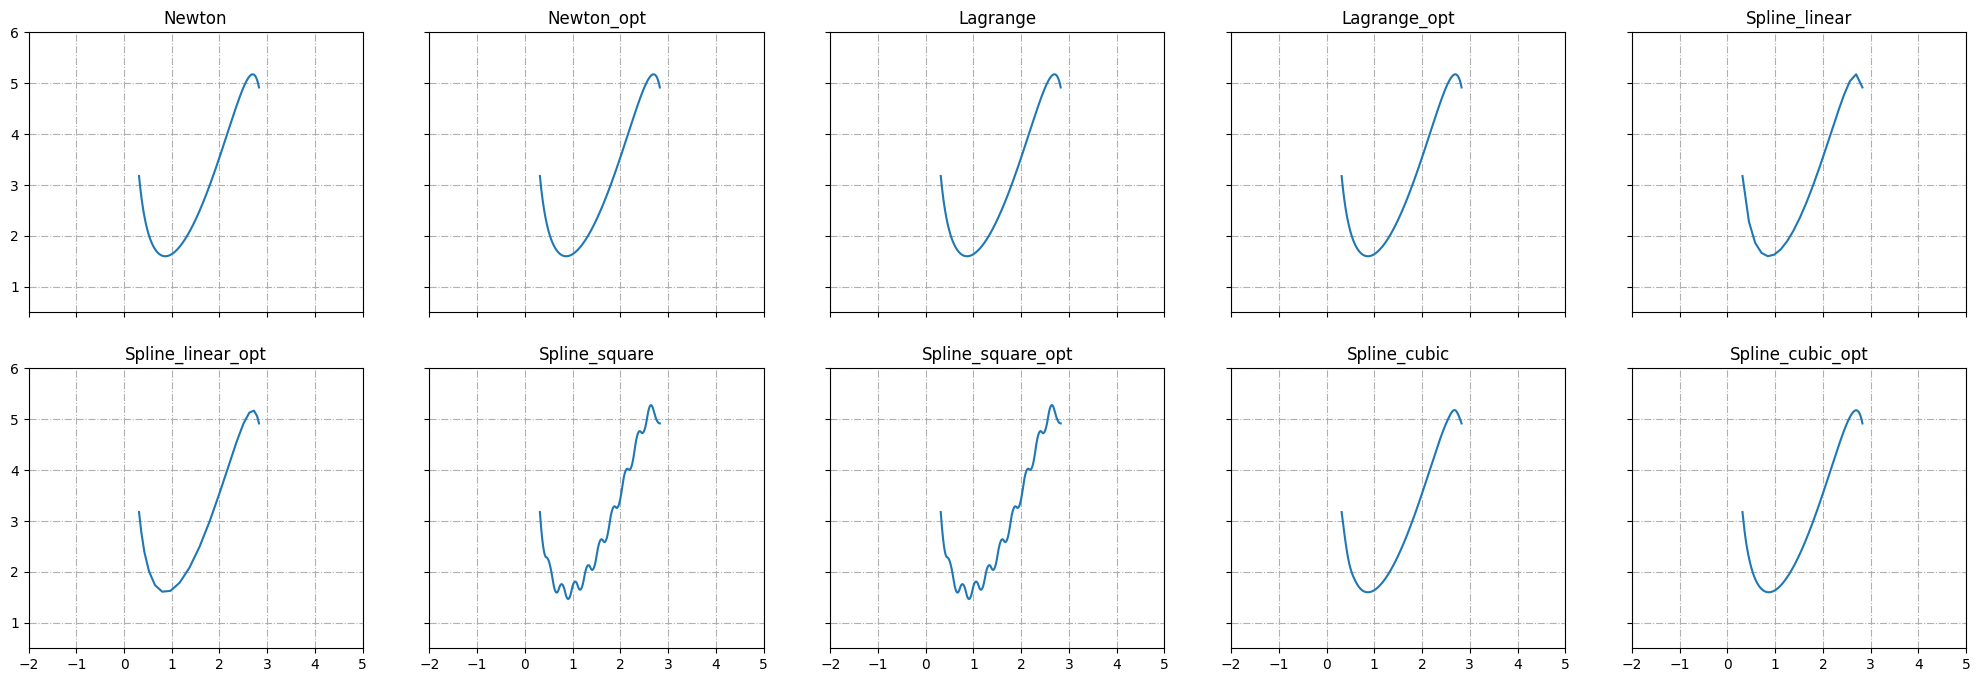

In [ ]:
show_all_graphics(n=20)

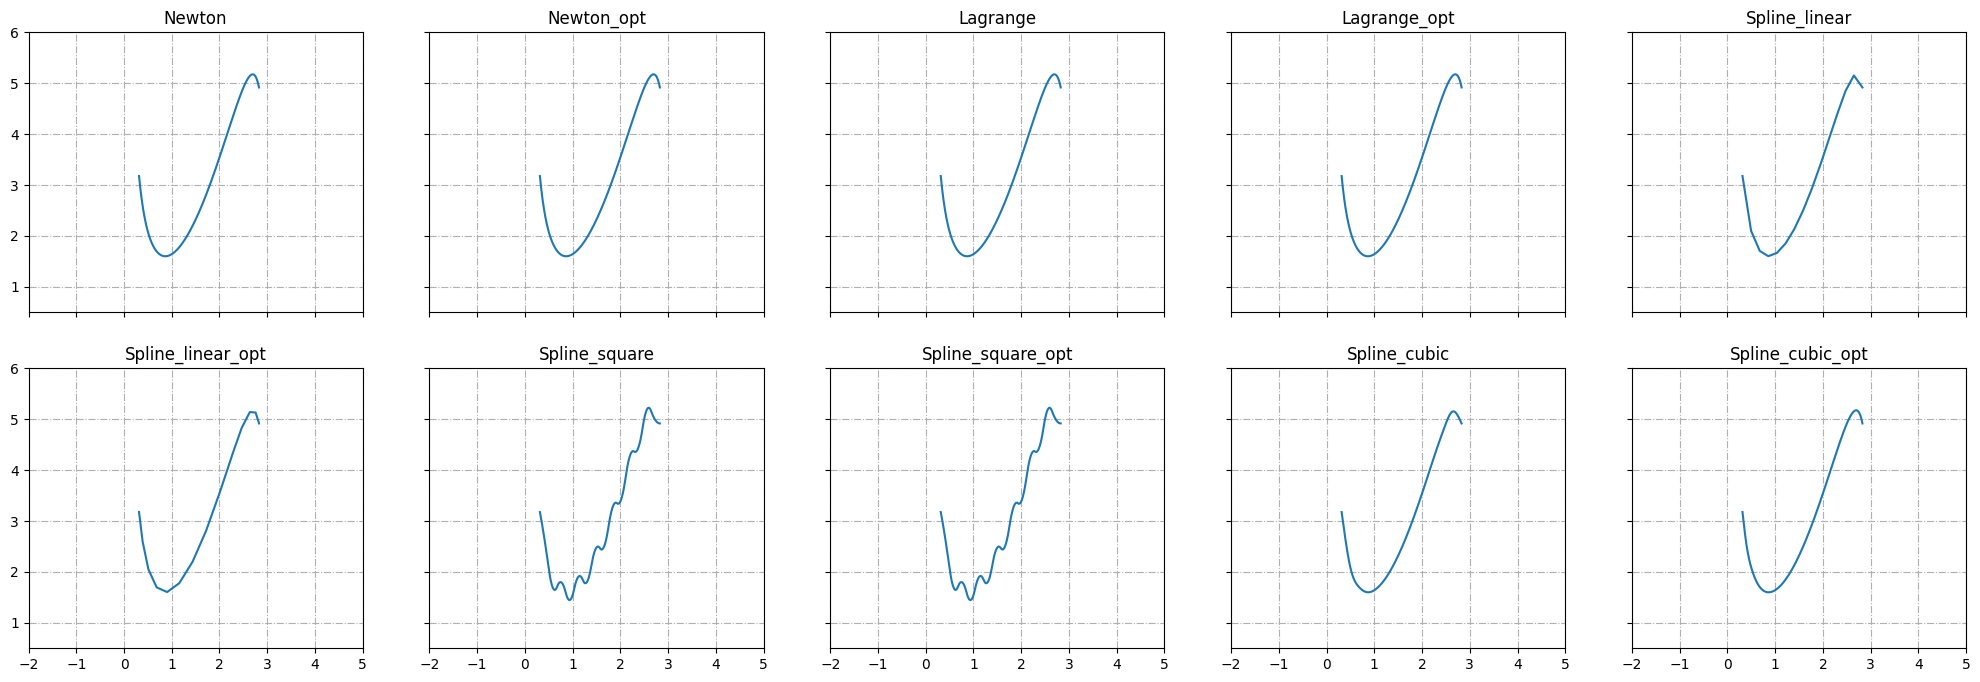

In [ ]:
show_all_graphics(n=15)

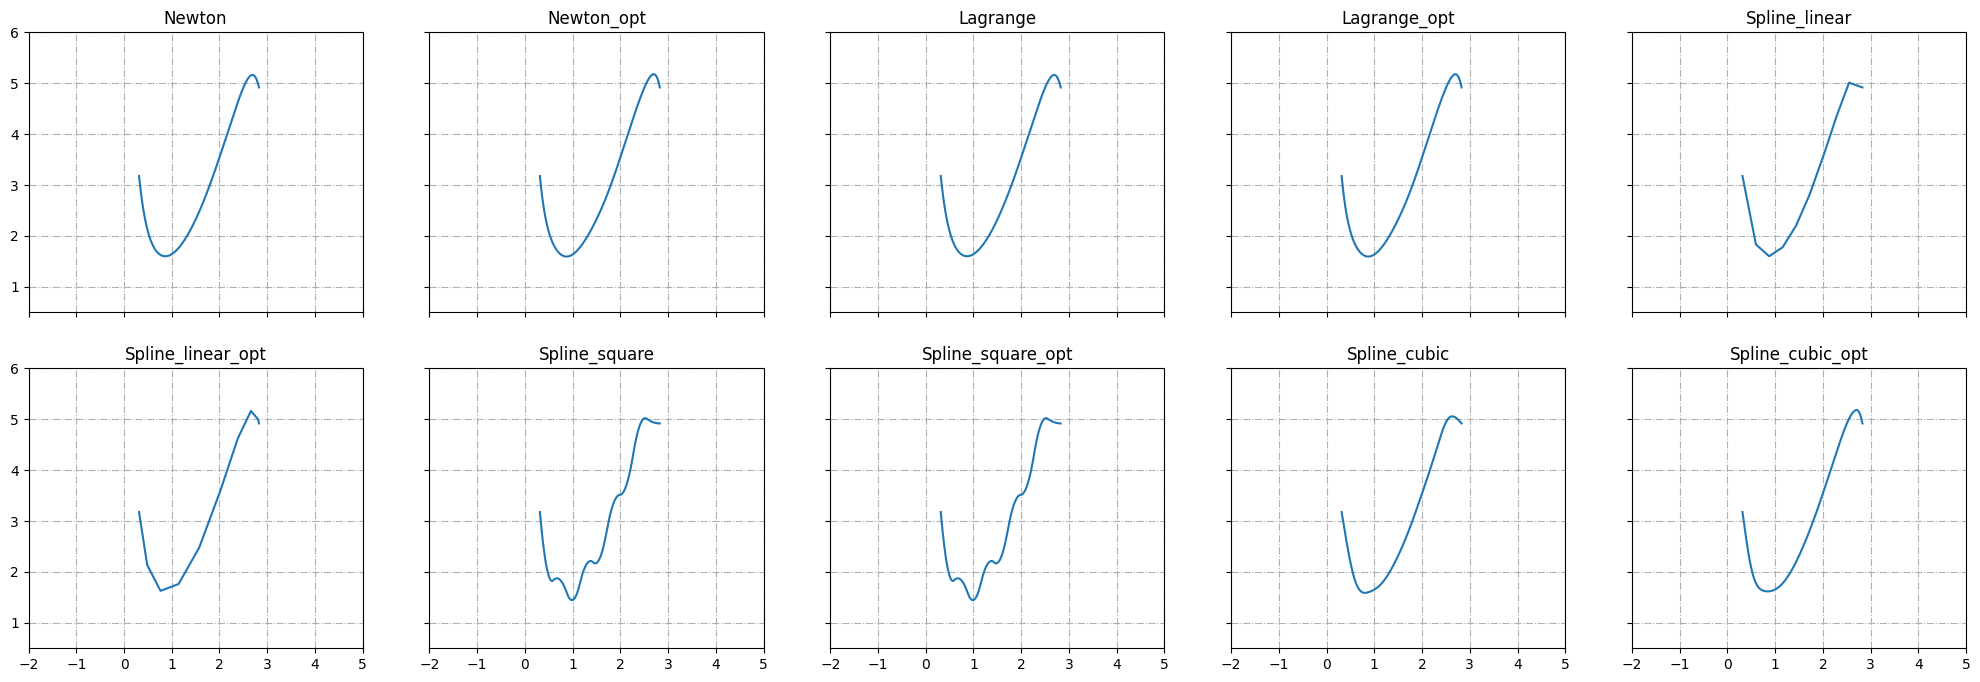

In [ ]:
show_all_graphics(n=10)

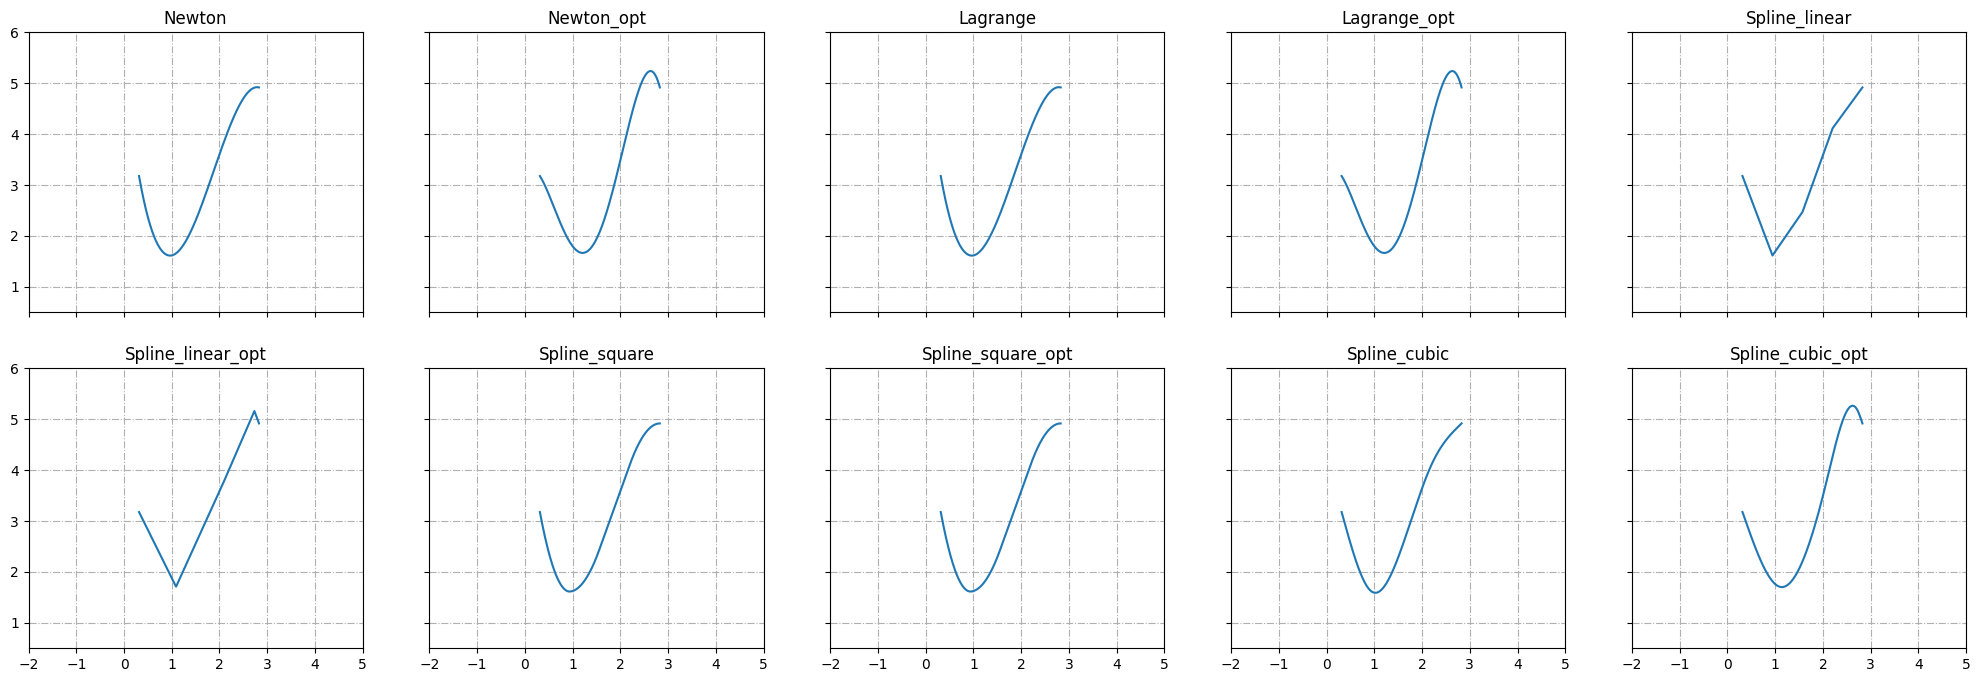

In [ ]:
show_all_graphics(n=5)

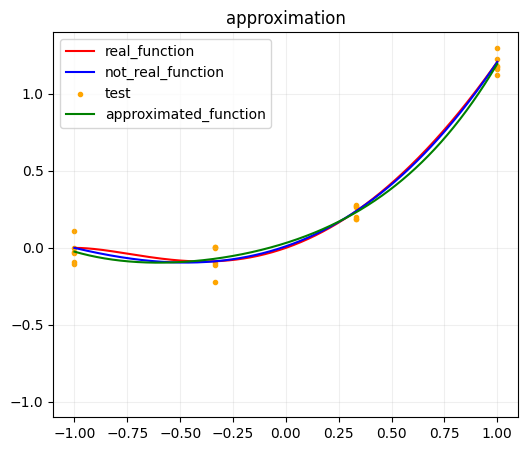

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

a = -1
b = 1
n = 4
m = 24
p = m // n

def f(x):
    return x * np.log(x + 2)**2

X = np.linspace(a, b, n)
Xs = np.array([[i] * p for i in X])
Xs = np.ndarray.flatten(Xs)
y = np.zeros((n, p))
for i in range(n):
    y[i] = np.array([f(X[i]) for _ in range(p)]) + np.random.randn(p)/15
ys = np.ndarray.flatten(y)

def pol_fun(x):
    result = 0
    E = np.vander(Xs, N=n + 1, increasing=True)
    Et = np.transpose(E)
    coeff = np.linalg.solve(Et@E, Et@ys)
    for i in range(n + 1):
        result += coeff[i] * x**i
    return result

def MSE(f, X, f1):
    res = 0
    for i in range(len(X)):
        res += (f(X[i]) - f1(X[i]))**2
    return math.sqrt(res)

def show_function_points():
    x1 = np.linspace(a, b, 1000)
    plt.figure(figsize=(6, 5))
    plt.plot(x1, f(x1), label='real_function', c='r')
    plt.scatter(Xs, ys, label='test', c='orange', marker='.')

    plt.title("Generated points")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

def show_both_functions():
    x1 = np.linspace(a, b, 1000)

    plt.figure(figsize=(6, 5))
    plt.plot(x1, f(x1), label='real_function', c='r')
    plt.plot(x1, [res_q(x) for x in x1], label='not_real_function', c='b')
    plt.scatter(Xs, ys, label='test', c='orange', marker='.')

    # y1 = [_ for _ in range(len(X))]
    # for i in range(len(X)): y1[i] = pol_fun(X[i])
    # plt.plot(X, y1, label='approximated_function', c='g')
    y1 = [_ for _ in range(len(x1))]
    for i in range(len(x1)): y1[i] = pol_fun(x1[i])
    plt.plot(x1, y1, label='approximated_function', c='g')

    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.4])
    plt.title("approximation")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

def show_both_functions2():
    x1 = np.linspace(a, b, 1000)

    plt.figure(figsize=(6, 5))
    plt.plot(x1, f(x1), label='real_function', c='r', linewidth=0.5)
    plt.plot(x1, [res_q(x) for x in x1], label='not_real_function', c='b')

    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.4])
    plt.title("approximation")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

#show_function_points()

show_both_functions()



In [ ]:
MSE(f, X, pol_fun)

x = 0.1
q = [i for i in range(n)]
q[0] = 1
alpha = [None for _ in range(m)]
beta = [None for _ in range(m)]
# for j in range(0, n - 1):
#     alpha[j + 1] = sum([x[i] * q[j]**2 for i in range(m)]) / sum([x[i] * q[j]**2 for i in range(m)])
#     q[j + 1] = x * q[j] - alpha[j + 1]

def q(x, j):
    if j == 1:
        return x - sum(Xs) / m
    if j == 0:
        return 1
    if alpha[j] == None:
        alpha[j] = sum([Xs[i] * q(Xs[i], j - 1)**2 for i in range(m)]) / sum([q(Xs[i], j - 1)**2 for i in range(m)])
    if beta[j - 1] == None:
        beta[j - 1] = sum([Xs[i] * q(Xs[i], j - 1) * q(Xs[i], j - 2) for i in range(m)]) / sum([q(Xs[i], j - 2)**2 for i in range(m)])

    return x * q(x, j - 1) - alpha[j] * q(x, j - 1) - beta[j - 1] * q(x, j - 2)

ai = [0 for _ in range(n)]
for k in range(n):
    ai[k] = sum([q(Xs[s], k) * f(Xs[s]) for s in range(m)]) / sum([q(Xs[s], k)**2 for s in range(m)])
x = 0
def res_q(x):
    return sum([ai[k] * q(x, k) for k in range(n)])
result = []
for x in X:
    result.append(res_q(x))

In [ ]:
MSE(f, X, res_q)

0.7498971585440688

In [ ]:
#@title ввод данных в таблицу
n=5
import pandas as pd
table = []
for n in [1, 2, 3, 4, 5]:
    table.append([n, MSE(f, X, pol_fun), MSE(f, X, res_q)])

df = pd.DataFrame(table, columns=['степень полинома (n)',
                                  'сумма квадратов ошибок для МНК(нормальные уравнения)',
                                  'сумма квадратов ошибок для МНК(нормальные уравнения)',])

In [ ]:
df

,степень полинома (n),сумма квадратов ошибок для МНК(нормальные уравнения),сумма квадратов ошибок для МНК(нормальные уравнения)
0,1,0.529911,1.029394e+00
1,2,0.061214,5.297735e-01
2,3,0.046910,5.100303e-02
3,4,0.046910,9.524501e-16
4,5,0.046910,7.498972e-01


In [ ]:
for i in even_distributed_points(20):
    print(L(f, i, 5))

3.176379581186147
2.566472962819493
2.1204109796457233
1.823034818019332
1.6591856642948137
1.6137047048266602
1.6714331259693649
1.8172121140774216
2.0358828555053226
2.3122865366075636
2.631264343738636
2.9776574632530335
3.3363070815052494
3.692054384849778
4.02974055964111
4.334206792233743
4.590294268982166
4.782844176240879
4.896697700364366
4.916696027707127
